# KE5105 - Building Electrical Consumption Forecasting

# Modelling 1 - Preliminary model using SDE-3 data

## Load libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Load data

In [2]:
sde3_1_df = pd.read_csv(os.path.join('source', 'sde3-data', 'no_nan', 'sde3_no_nan1.csv'), parse_dates=True)

In [3]:
sde3_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 28 columns):
Pt_timeStamp                        1380 non-null object
PWM.SDE3.IC1                        1380 non-null int64
PWM.SDE3.IC2                        1380 non-null float64
PWM.SDE3.MCC..AC.                   1380 non-null float64
PWM.CELC.IC1                        1380 non-null float64
PWM.CELC.IC2                        1380 non-null float64
PWM.SDE1                            1380 non-null float64
PWM.SDE2.SSB                        1380 non-null float64
PWM.SDE2.AC                         1380 non-null float64
PWM.SDE3.Ext                        1380 non-null float64
PWM.Street.Light                    1380 non-null float64
BTU.SDE3.Chiller.Plant              1380 non-null float64
BTU.SDE3.2                          1380 non-null float64
BTU.SDE3.1.2                        1380 non-null float64
PWM.SDE3.IC1_30min_avg              1380 non-null int64
PWM.SDE3.IC2_30min_avg      

In [4]:
sde3_1_df.iloc[:5, :5]

,Pt_timeStamp,PWM.SDE3.IC1,PWM.SDE3.IC2,PWM.SDE3.MCC..AC.,PWM.CELC.IC1
0,2016-06-01 00:30:00,9098611,8306487.5,5476307.0,1269571.50
1,2016-06-01 01:00:00,9098669,8306495.0,5476307.5,1269572.00
2,2016-06-01 01:30:00,9098729,8306501.0,5476308.0,1269572.63
3,2016-06-01 02:00:00,9098788,8306509.0,5476310.0,1269573.50
4,2016-06-01 02:30:00,9098845,8306517.0,5476311.0,1269574.00


In [5]:
sde3_1_df.iloc[:5, 5:11]

,PWM.CELC.IC2,PWM.SDE1,PWM.SDE2.SSB,PWM.SDE2.AC,PWM.SDE3.Ext,PWM.Street.Light
0,547602.31,899566.94,2505527.25,224610.72,868196.25,85832.10
1,547606.06,899573.25,2505536.25,224610.72,868200.31,85834.24
2,547610.00,899579.50,2505547.00,224610.72,868204.38,85836.35
3,547613.69,899585.94,2505557.25,224610.72,868208.50,85838.46
4,547617.50,899591.88,2505566.25,224610.72,868212.63,85840.59


In [6]:
sde3_1_df.iloc[:5, 11:15]

,BTU.SDE3.Chiller.Plant,BTU.SDE3.2,BTU.SDE3.1.2,PWM.SDE3.IC1_30min_avg
0,4150560.5,943278.94,1449962.88,60
1,4150560.5,943278.94,1449962.88,58
2,4150560.5,943278.94,1449962.88,60
3,4150560.5,943278.94,1449962.88,59
4,4150560.5,943278.94,1449962.88,57


In [7]:
sde3_1_df.iloc[:5, 15:18]

,PWM.SDE3.IC2_30min_avg,PWM.SDE3.MCC..AC._30min_avg,PWM.CELC.IC1_30min_avg
0,8.5,1.5,1.00
1,7.5,0.5,0.50
2,6.0,0.5,0.63
3,8.0,2.0,0.87
4,8.0,1.0,0.50


In [8]:
sde3_1_df.iloc[:5, 18:21]

,PWM.CELC.IC2_30min_avg,PWM.SDE1_30min_avg,PWM.SDE2.SSB_30min_avg
0,3.81,6.63,10.25
1,3.75,6.31,9.00
2,3.94,6.25,10.75
3,3.69,6.44,10.25
4,3.81,5.94,9.00


In [9]:
sde3_1_df.iloc[:5, 21:24]

,PWM.SDE2.AC_30min_avg,PWM.SDE3.Ext_30min_avg,PWM.Street.Light_30min_avg
0,0,4.12,2.09
1,0,4.06,2.14
2,0,4.07,2.11
3,0,4.12,2.11
4,0,4.13,2.13


In [10]:
sde3_1_df.iloc[:5, 24:27]

,BTU.SDE3.Chiller.Plant_30min_avg,BTU.SDE3.2_30min_avg,BTU.SDE3.1.2_30min_avg
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [11]:
sde3_1_df.iloc[:5, 27:]

,PWM_30min_avg
0,39.10
1,39.24
2,37.75
3,37.52
4,38.49


In [12]:
sde3_1_df.loc[:, 'Pt_timeStamp'] = pd.to_datetime(sde3_1_df['Pt_timeStamp'])

In [13]:
sde3_1_df['Pt_timeStamp'][:5]

0   2016-06-01 00:30:00
1   2016-06-01 01:00:00
2   2016-06-01 01:30:00
3   2016-06-01 02:00:00
4   2016-06-01 02:30:00
Name: Pt_timeStamp, dtype: datetime64[ns]

In [14]:
sde3_1_df.set_index('Pt_timeStamp', drop=True, inplace=True)

In [15]:
sde3_1_df.iloc[:5, :4]

,PWM.SDE3.IC1,PWM.SDE3.IC2,PWM.SDE3.MCC..AC.,PWM.CELC.IC1
Pt_timeStamp,,,,
2016-06-01 00:30:00,9098611,8306487.5,5476307.0,1269571.50
2016-06-01 01:00:00,9098669,8306495.0,5476307.5,1269572.00
2016-06-01 01:30:00,9098729,8306501.0,5476308.0,1269572.63
2016-06-01 02:00:00,9098788,8306509.0,5476310.0,1269573.50
2016-06-01 02:30:00,9098845,8306517.0,5476311.0,1269574.00


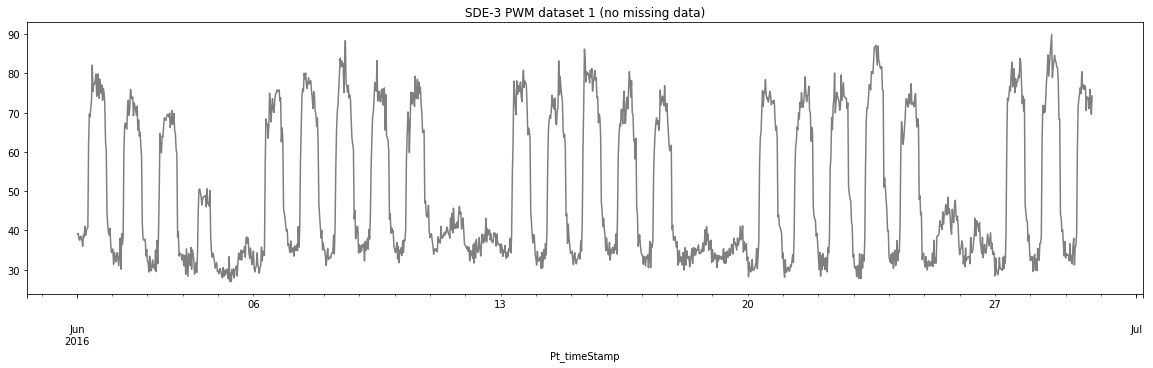

In [16]:
sde3_1_df.loc[:, 'PWM_30min_avg'].plot(figsize=(20, 5), title='SDE-3 PWM dataset 1 (no missing data)', color='black', alpha=0.5)

## Split the data into train, validation and test set

In [17]:
# Perform a simple split for the initial model.
# Min,max indices for the datasets
train_max_idx = int(len(sde3_1_df) / 4 * 2)
val_max_idx = int(len(sde3_1_df) / 4 * 3)
print('train indices = [%d, %d], len = %d' % (0, train_max_idx-1, train_max_idx))
print('validation indices = [%d, %d, len = %d]' % (train_max_idx, val_max_idx-1, val_max_idx - train_max_idx))
print('test indices = [%d, %d], len = %d' % (val_max_idx, len(sde3_1_df)-1, len(sde3_1_df) - val_max_idx))

train indices = [0, 689], len = 690
validation indices = [690, 1034, len = 345]
test indices = [1035, 1379], len = 345


In [18]:
sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1)[:10]

array([[ 39.1 ],
       [ 39.24],
       [ 37.75],
       [ 37.52],
       [ 38.49],
       [ 38.45],
       [ 37.42],
       [ 35.99],
       [ 38.83],
       [ 38.28]])

In [19]:
# Normalise the data. Note that the normalisation parameters are determined only on the training data.
scaler = StandardScaler()
scaler.fit(sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1)[:train_max_idx])
sde3_1_df.loc[:, 'PWM_norm'] = scaler.transform(sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1))
sde3_1_df.iloc[:5, -4:]

,BTU.SDE3.2_30min_avg,BTU.SDE3.1.2_30min_avg,PWM_30min_avg,PWM_norm
Pt_timeStamp,,,,
2016-06-01 00:30:00,0.0,0.0,39.10,-0.565319
2016-06-01 01:00:00,0.0,0.0,39.24,-0.557377
2016-06-01 01:30:00,0.0,0.0,37.75,-0.641904
2016-06-01 02:00:00,0.0,0.0,37.52,-0.654952
2016-06-01 02:30:00,0.0,0.0,38.49,-0.599924


In [20]:
# Generator which yields a batch of data each time it is called.
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6, verbose=0):
    
    # Set the data max index limit
    if max_index is None:
        max_index = len(data) - delay - 1
    else:
        max_index = max_index - delay
    # Set the current data start index limit
    i = min_index + lookback
    if verbose:
        print('\nstarting generator ... batch start index i = %d\n' % i)
    
    while 1:
        if verbose:
            print('\n batch start index i = %d' % i)
        if shuffle:
            # Randomly select a batch from data 
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            # Select a batch starting from i
            # if i + batch_size >= max_index:
            #     print('\nrestarting generator ... i = %d\n' % i)
            #     i = min_index + lookback
                # print('reset i ... i = %d' % i)
            rows = np.arange(i, min(i + batch_size, max_index + 1))
            if i + batch_size >= max_index:
                i = min_index + lookback
            else:
                i += len(rows)
        
        # Each row in samples is a training sample from t-lookback to t-1.
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        # Each value in targets is a training label at t+delay.
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        
        yield samples, targets

In [21]:
# Parameters for generating the datasets
lookback = 48  # 1 day; each day has 48 observations
step = 1  # sampling rate used for the lookback period
delay = 0  # 1 step ahead prediction
# batch_size = 128
batch_size = 32

In [22]:
# Generators for the train, validation and test sets.
train_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                      lookback=lookback, delay=delay, min_index=0, max_index=train_max_idx-1,
                      batch_size=batch_size, step=step)
val_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                    lookback=lookback, delay=delay, min_index=train_max_idx, max_index=val_max_idx-1,
                    batch_size=batch_size, step=step)
test_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                     lookback=lookback, delay=delay, min_index=val_max_idx, max_index=None,
                     batch_size=batch_size, step=step)

In [23]:
# Number of batches in each dataset. This is needed for training, evaluating the RNN.
train_steps = ((train_max_idx - lookback + 1 - delay) // batch_size) + 1
val_steps = ((val_max_idx - train_max_idx - lookback + 1 - delay) // batch_size) + 1
test_steps = ((len(sde3_1_df) - val_max_idx - lookback + 1 - delay) // batch_size) + 1
print('train steps = %d\nvalidation steps = %d\ntest steps = %d' % (train_steps, val_steps, test_steps))

train steps = 21
validation steps = 10
test steps = 10


## Calculate the MAE for a Simple Last Observation Carry Forward (LOCF) Model

In [24]:
# Calculate a simple baseline for model accuracy using MAE. Baseline model predicts label at t as label at t-1
# (LOCF last observation carry forward)
batch_maes = []
locf_preds = []

for a_step in range(val_steps):
    samples, targets = next(val_gen)
    a_pred = samples[:, -1, 0]
    locf_preds.append(a_pred)
    mae = np.mean(np.abs(a_pred - targets))
    batch_maes.append(mae)
print('MAE = %f' % (np.mean(batch_maes)))

MAE = 0.170151


In [25]:
print('Actual MAE without normalization = %f' % (np.mean(batch_maes) * sde3_1_df['PWM_30min_avg'].values[:train_max_idx].std()))

Actual MAE without normalization = 2.999319


In [26]:
locf_preds = scaler.inverse_transform(np.concatenate(locf_preds))
locf_preds[:10]

array([ 67.13,  66.49,  70.87,  70.56,  67.14,  73.  ,  75.49,  67.26,
        67.62,  72.56])

In [27]:
locf_preds.shape

(297,)

## Train a Baseline Recurrent Neural Network

In [28]:
model = Sequential()
model.add(layers.GRU(16, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])

In [29]:
history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=30,
                              validation_data=val_gen, validation_steps=val_steps, workers=0, use_multiprocessing=False)

Epoch 1/30


 1/21 [>.............................] - ETA: 12s - loss: 1.1182 - mean_absolute_percentage_error: 108.9645

 3/21 [===>..........................] - ETA: 4s - loss: 1.0002 - mean_absolute_percentage_error: 106.4015 

 5/21 [======>.......................] - ETA: 2s - loss: 0.9141 - mean_absolute_percentage_error: 106.0787

 7/21 [=========>....................] - ETA: 1s - loss: 0.9301 - mean_absolute_percentage_error: 103.4736

 9/21 [===========>..................] - ETA: 1s - loss: 0.9322 - mean_absolute_percentage_error: 102.3923

11/21 [==============>...............] - ETA: 0s - loss: 0.9262 - mean_absolute_percentage_error: 100.5053

13/21 [=================>............] - ETA: 0s - loss: 0.9297 - mean_absolute_percentage_error: 99.0683 

15/21 [====================>.........] - ETA: 0s - loss: 0.8703 - mean_absolute_percentage_error: 97.2913

17/21 [=======================>......] - ETA: 0s - loss: 0.8316 - mean_absolute_percentage_error: 94.7341

19/21 [==========================>...] - ETA: 0s - loss: 0.8433 - mean_absolute_percentage_error: 93.8672

21/21 [==============================] - 1s 66ms/step - loss: 0.8826 - mean_absolute_percentage_error: 94.1235 - val_loss: 0.7307 - val_mean_absolute_percentage_error: 79.6592


Epoch 2/30
 1/21 [>.............................] - ETA: 0s - loss: 0.8136 - mean_absolute_percentage_error: 78.5467

 4/21 [====>.........................] - ETA: 0s - loss: 0.6696 - mean_absolute_percentage_error: 106.1916

 7/21 [=========>....................] - ETA: 0s - loss: 0.6639 - mean_absolute_percentage_error: 90.7318 

10/21 [=============>................] - ETA: 0s - loss: 0.6903 - mean_absolute_percentage_error: 86.9636

13/21 [=================>............] - ETA: 0s - loss: 0.6752 - mean_absolute_percentage_error: 82.8767

16/21 [=====================>........] - ETA: 0s - loss: 0.6033 - mean_absolute_percentage_error: 77.3328

19/21 [==========================>...] - ETA: 0s - loss: 0.5965 - mean_absolute_percentage_error: 74.4809

21/21 [==============================] - 0s 22ms/step - loss: 0.6523 - mean_absolute_percentage_error: 75.8601 - val_loss: 0.4790 - val_mean_absolute_percentage_error: 55.6054


Epoch 3/30
 1/21 [>.............................] - ETA: 0s - loss: 0.5626 - mean_absolute_percentage_error: 53.4990

 4/21 [====>.........................] - ETA: 0s - loss: 0.4627 - mean_absolute_percentage_error: 117.1858

 6/21 [=======>......................] - ETA: 0s - loss: 0.4040 - mean_absolute_percentage_error: 90.5789 

 8/21 [==========>...................] - ETA: 0s - loss: 0.4106 - mean_absolute_percentage_error: 82.4143

11/21 [==============>...............] - ETA: 0s - loss: 0.4345 - mean_absolute_percentage_error: 76.2646

14/21 [===================>..........] - ETA: 0s - loss: 0.4286 - mean_absolute_percentage_error: 73.0134

17/21 [=======================>......] - ETA: 0s - loss: 0.3718 - mean_absolute_percentage_error: 64.1020

20/21 [===========================>..] - ETA: 0s - loss: 0.3818 - mean_absolute_percentage_error: 62.5522

21/21 [==============================] - 1s 24ms/step - loss: 0.4574 - mean_absolute_percentage_error: 65.3181 - val_loss: 0.3097 - val_mean_absolute_percentage_error: 41.8784


Epoch 4/30


 1/21 [>.............................] - ETA: 0s - loss: 0.3916 - mean_absolute_percentage_error: 39.6159

 4/21 [====>.........................] - ETA: 0s - loss: 0.3317 - mean_absolute_percentage_error: 122.2184

 7/21 [=========>....................] - ETA: 0s - loss: 0.2817 - mean_absolute_percentage_error: 82.6453 

10/21 [=============>................] - ETA: 0s - loss: 0.3151 - mean_absolute_percentage_error: 75.6139

13/21 [=================>............] - ETA: 0s - loss: 0.3225 - mean_absolute_percentage_error: 69.7322

16/21 [=====================>........] - ETA: 0s - loss: 0.2893 - mean_absolute_percentage_error: 65.3537

19/21 [==========================>...] - ETA: 0s - loss: 0.2917 - mean_absolute_percentage_error: 61.2633

21/21 [==============================] - 0s 22ms/step - loss: 0.3675 - mean_absolute_percentage_error: 63.5422 - val_loss: 0.2584 - val_mean_absolute_percentage_error: 38.7814


Epoch 5/30


 1/21 [>.............................] - ETA: 0s - loss: 0.3020 - mean_absolute_percentage_error: 32.3462

 3/21 [===>..........................] - ETA: 0s - loss: 0.3147 - mean_absolute_percentage_error: 67.4090

 6/21 [=======>......................] - ETA: 0s - loss: 0.2314 - mean_absolute_percentage_error: 74.5356

 9/21 [===========>..................] - ETA: 0s - loss: 0.2618 - mean_absolute_percentage_error: 68.7091

12/21 [================>.............] - ETA: 0s - loss: 0.2799 - mean_absolute_percentage_error: 63.6834

15/21 [====================>.........] - ETA: 0s - loss: 0.2639 - mean_absolute_percentage_error: 60.9477

18/21 [========================>.....] - ETA: 0s - loss: 0.2542 - mean_absolute_percentage_error: 55.8701

21/21 [==============================] - 0s 23ms/step - loss: 0.3299 - mean_absolute_percentage_error: 57.2270 - val_loss: 0.2334 - val_mean_absolute_percentage_error: 36.4449


Epoch 6/30
 1/21 [>.............................] - ETA: 0s - loss: 0.2559 - mean_absolute_percentage_error: 28.2451

 4/21 [====>.........................] - ETA: 0s - loss: 0.2553 - mean_absolute_percentage_error: 84.9948

 7/21 [=========>....................] - ETA: 0s - loss: 0.2179 - mean_absolute_percentage_error: 59.4800

10/21 [=============>................] - ETA: 0s - loss: 0.2455 - mean_absolute_percentage_error: 57.9162

13/21 [=================>............] - ETA: 0s - loss: 0.2548 - mean_absolute_percentage_error: 54.7129

16/21 [=====================>........] - ETA: 0s - loss: 0.2317 - mean_absolute_percentage_error: 52.4033

18/21 [========================>.....] - ETA: 0s - loss: 0.2326 - mean_absolute_percentage_error: 50.6083

21/21 [==============================] - 0s 23ms/step - loss: 0.3048 - mean_absolute_percentage_error: 52.2018 - val_loss: 0.2141 - val_mean_absolute_percentage_error: 34.1944


Epoch 7/30
 1/21 [>.............................] - ETA: 0s - loss: 0.2266 - mean_absolute_percentage_error: 25.5495

 4/21 [====>.........................] - ETA: 0s - loss: 0.2333 - mean_absolute_percentage_error: 75.1530

 7/21 [=========>....................] - ETA: 0s - loss: 0.2011 - mean_absolute_percentage_error: 53.4623

10/21 [=============>................] - ETA: 0s - loss: 0.2255 - mean_absolute_percentage_error: 52.6641

13/21 [=================>............] - ETA: 0s - loss: 0.2345 - mean_absolute_percentage_error: 50.0028

15/21 [====================>.........] - ETA: 0s - loss: 0.2225 - mean_absolute_percentage_error: 50.5107

18/21 [========================>.....] - ETA: 0s - loss: 0.2149 - mean_absolute_percentage_error: 46.6585

21/21 [==============================] - 0s 23ms/step - loss: 0.2832 - mean_absolute_percentage_error: 48.2969 - val_loss: 0.1975 - val_mean_absolute_percentage_error: 31.9956


Epoch 8/30
 1/21 [>.............................] - ETA: 0s - loss: 0.2070 - mean_absolute_percentage_error: 23.6937

 3/21 [===>..........................] - ETA: 0s - loss: 0.2314 - mean_absolute_percentage_error: 56.8213

 6/21 [=======>......................] - ETA: 0s - loss: 0.1817 - mean_absolute_percentage_error: 55.0671

 9/21 [===========>..................] - ETA: 0s - loss: 0.2028 - mean_absolute_percentage_error: 52.3551

12/21 [================>.............] - ETA: 0s - loss: 0.2169 - mean_absolute_percentage_error: 49.0980

15/21 [====================>.........] - ETA: 0s - loss: 0.2069 - mean_absolute_percentage_error: 47.8560

18/21 [========================>.....] - ETA: 0s - loss: 0.2002 - mean_absolute_percentage_error: 44.2162

21/21 [==============================] - 0s 23ms/step - loss: 0.2644 - mean_absolute_percentage_error: 45.6736 - val_loss: 0.1863 - val_mean_absolute_percentage_error: 29.9713


Epoch 9/30
 1/21 [>.............................] - ETA: 0s - loss: 0.2001 - mean_absolute_percentage_error: 22.7416

 4/21 [====>.........................] - ETA: 0s - loss: 0.2031 - mean_absolute_percentage_error: 68.9577

 7/21 [=========>....................] - ETA: 0s - loss: 0.1796 - mean_absolute_percentage_error: 49.5441

10/21 [=============>................] - ETA: 0s - loss: 0.1960 - mean_absolute_percentage_error: 47.8697

13/21 [=================>............] - ETA: 0s - loss: 0.2044 - mean_absolute_percentage_error: 45.2402

16/21 [=====================>........] - ETA: 0s - loss: 0.1883 - mean_absolute_percentage_error: 43.7001

19/21 [==========================>...] - ETA: 0s - loss: 0.1911 - mean_absolute_percentage_error: 41.4970

21/21 [==============================] - 0s 22ms/step - loss: 0.2499 - mean_absolute_percentage_error: 43.5859 - val_loss: 0.1769 - val_mean_absolute_percentage_error: 28.3540


Epoch 10/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1936 - mean_absolute_percentage_error: 21.9588

 4/21 [====>.........................] - ETA: 0s - loss: 0.1937 - mean_absolute_percentage_error: 66.8183

 7/21 [=========>....................] - ETA: 0s - loss: 0.1733 - mean_absolute_percentage_error: 48.2647

10/21 [=============>................] - ETA: 0s - loss: 0.1869 - mean_absolute_percentage_error: 46.2459

13/21 [=================>............] - ETA: 0s - loss: 0.1947 - mean_absolute_percentage_error: 43.5433

16/21 [=====================>........] - ETA: 0s - loss: 0.1802 - mean_absolute_percentage_error: 42.1572

19/21 [==========================>...] - ETA: 0s - loss: 0.1836 - mean_absolute_percentage_error: 40.0893

21/21 [==============================] - 0s 22ms/step - loss: 0.2386 - mean_absolute_percentage_error: 41.9810 - val_loss: 0.1710 - val_mean_absolute_percentage_error: 27.3149


Epoch 11/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1909 - mean_absolute_percentage_error: 21.5941

 3/21 [===>..........................] - ETA: 0s - loss: 0.1969 - mean_absolute_percentage_error: 49.7249

 6/21 [=======>......................] - ETA: 0s - loss: 0.1635 - mean_absolute_percentage_error: 51.8511

 8/21 [==========>...................] - ETA: 0s - loss: 0.1723 - mean_absolute_percentage_error: 47.9473

11/21 [==============>...............] - ETA: 0s - loss: 0.1832 - mean_absolute_percentage_error: 45.3044

14/21 [===================>..........] - ETA: 0s - loss: 0.1865 - mean_absolute_percentage_error: 44.4474

17/21 [=======================>......] - ETA: 0s - loss: 0.1713 - mean_absolute_percentage_error: 40.2499

20/21 [===========================>..] - ETA: 0s - loss: 0.1801 - mean_absolute_percentage_error: 39.2961

21/21 [==============================] - 1s 26ms/step - loss: 0.2311 - mean_absolute_percentage_error: 41.1719 - val_loss: 0.1663 - val_mean_absolute_percentage_error: 26.6242


Epoch 12/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1882 - mean_absolute_percentage_error: 21.4767

 3/21 [===>..........................] - ETA: 0s - loss: 0.1941 - mean_absolute_percentage_error: 49.2058

 6/21 [=======>......................] - ETA: 0s - loss: 0.1616 - mean_absolute_percentage_error: 53.0593

 9/21 [===========>..................] - ETA: 0s - loss: 0.1762 - mean_absolute_percentage_error: 48.5625

12/21 [================>.............] - ETA: 0s - loss: 0.1835 - mean_absolute_percentage_error: 44.3218

15/21 [====================>.........] - ETA: 0s - loss: 0.1778 - mean_absolute_percentage_error: 43.2158

18/21 [========================>.....] - ETA: 0s - loss: 0.1740 - mean_absolute_percentage_error: 40.0216

21/21 [==============================] - 0s 23ms/step - loss: 0.2251 - mean_absolute_percentage_error: 40.7962 - val_loss: 0.1657 - val_mean_absolute_percentage_error: 26.2115


Epoch 13/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1884 - mean_absolute_percentage_error: 21.3774

 3/21 [===>..........................] - ETA: 0s - loss: 0.1926 - mean_absolute_percentage_error: 48.1078

 6/21 [=======>......................] - ETA: 0s - loss: 0.1617 - mean_absolute_percentage_error: 53.2122

 9/21 [===========>..................] - ETA: 0s - loss: 0.1757 - mean_absolute_percentage_error: 48.4757

12/21 [================>.............] - ETA: 0s - loss: 0.1814 - mean_absolute_percentage_error: 43.9935

15/21 [====================>.........] - ETA: 0s - loss: 0.1759 - mean_absolute_percentage_error: 42.8265

18/21 [========================>.....] - ETA: 0s - loss: 0.1721 - mean_absolute_percentage_error: 39.6629

20/21 [===========================>..] - ETA: 0s - loss: 0.1750 - mean_absolute_percentage_error: 38.7335

21/21 [==============================] - 1s 24ms/step - loss: 0.2214 - mean_absolute_percentage_error: 40.3469 - val_loss: 0.1636 - val_mean_absolute_percentage_error: 25.8282


Epoch 14/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1884 - mean_absolute_percentage_error: 21.4052

 3/21 [===>..........................] - ETA: 0s - loss: 0.1914 - mean_absolute_percentage_error: 47.7926

 6/21 [=======>......................] - ETA: 0s - loss: 0.1604 - mean_absolute_percentage_error: 53.8313

 9/21 [===========>..................] - ETA: 0s - loss: 0.1739 - mean_absolute_percentage_error: 48.6568

12/21 [================>.............] - ETA: 0s - loss: 0.1793 - mean_absolute_percentage_error: 43.9702

15/21 [====================>.........] - ETA: 0s - loss: 0.1741 - mean_absolute_percentage_error: 42.7227

18/21 [========================>.....] - ETA: 0s - loss: 0.1704 - mean_absolute_percentage_error: 39.5424

21/21 [==============================] - 0s 24ms/step - loss: 0.2179 - mean_absolute_percentage_error: 40.1075 - val_loss: 0.1626 - val_mean_absolute_percentage_error: 25.5379


Epoch 15/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1888 - mean_absolute_percentage_error: 21.4115

 4/21 [====>.........................] - ETA: 0s - loss: 0.1873 - mean_absolute_percentage_error: 70.4633

 7/21 [=========>....................] - ETA: 0s - loss: 0.1687 - mean_absolute_percentage_error: 50.3980

10/21 [=============>................] - ETA: 0s - loss: 0.1742 - mean_absolute_percentage_error: 46.0471

13/21 [=================>............] - ETA: 0s - loss: 0.1799 - mean_absolute_percentage_error: 42.4223

16/21 [=====================>........] - ETA: 0s - loss: 0.1678 - mean_absolute_percentage_error: 40.8344

19/21 [==========================>...] - ETA: 0s - loss: 0.1714 - mean_absolute_percentage_error: 38.7040

21/21 [==============================] - 0s 23ms/step - loss: 0.2146 - mean_absolute_percentage_error: 39.8508 - val_loss: 0.1624 - val_mean_absolute_percentage_error: 25.3818


Epoch 16/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1877 - mean_absolute_percentage_error: 21.2692

 3/21 [===>..........................] - ETA: 0s - loss: 0.1892 - mean_absolute_percentage_error: 46.6604

 5/21 [======>.......................] - ETA: 0s - loss: 0.1747 - mean_absolute_percentage_error: 62.7047

 7/21 [=========>....................] - ETA: 0s - loss: 0.1689 - mean_absolute_percentage_error: 50.2081

 9/21 [===========>..................] - ETA: 0s - loss: 0.1724 - mean_absolute_percentage_error: 48.4420

11/21 [==============>...............] - ETA: 0s - loss: 0.1739 - mean_absolute_percentage_error: 44.8623

13/21 [=================>............] - ETA: 0s - loss: 0.1792 - mean_absolute_percentage_error: 42.1417

16/21 [=====================>........] - ETA: 0s - loss: 0.1673 - mean_absolute_percentage_error: 40.5759

19/21 [==========================>...] - ETA: 0s - loss: 0.1708 - mean_absolute_percentage_error: 38.4523

21/21 [==============================] - 1s 29ms/step - loss: 0.2123 - mean_absolute_percentage_error: 39.5085 - val_loss: 0.1620 - val_mean_absolute_percentage_error: 25.2009


Epoch 17/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1878 - mean_absolute_percentage_error: 21.2537

 3/21 [===>..........................] - ETA: 0s - loss: 0.1887 - mean_absolute_percentage_error: 46.2844

 6/21 [=======>......................] - ETA: 0s - loss: 0.1595 - mean_absolute_percentage_error: 54.0224

 9/21 [===========>..................] - ETA: 0s - loss: 0.1716 - mean_absolute_percentage_error: 48.4440

11/21 [==============>...............] - ETA: 0s - loss: 0.1731 - mean_absolute_percentage_error: 44.8389

14/21 [===================>..........] - ETA: 0s - loss: 0.1760 - mean_absolute_percentage_error: 43.2262

17/21 [=======================>......] - ETA: 0s - loss: 0.1629 - mean_absolute_percentage_error: 39.3023

20/21 [===========================>..] - ETA: 0s - loss: 0.1709 - mean_absolute_percentage_error: 38.1308

21/21 [==============================] - 1s 25ms/step - loss: 0.2102 - mean_absolute_percentage_error: 39.3441 - val_loss: 0.1616 - val_mean_absolute_percentage_error: 25.0871


Epoch 18/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1870 - mean_absolute_percentage_error: 21.1664

 3/21 [===>..........................] - ETA: 0s - loss: 0.1885 - mean_absolute_percentage_error: 46.0485

 6/21 [=======>......................] - ETA: 0s - loss: 0.1597 - mean_absolute_percentage_error: 53.8647

 9/21 [===========>..................] - ETA: 0s - loss: 0.1712 - mean_absolute_percentage_error: 48.2325

12/21 [================>.............] - ETA: 0s - loss: 0.1758 - mean_absolute_percentage_error: 43.3336

15/21 [====================>.........] - ETA: 0s - loss: 0.1712 - mean_absolute_percentage_error: 42.0604

18/21 [========================>.....] - ETA: 0s - loss: 0.1674 - mean_absolute_percentage_error: 38.9124

21/21 [==============================] - 1s 24ms/step - loss: 0.2086 - mean_absolute_percentage_error: 39.0940 - val_loss: 0.1620 - val_mean_absolute_percentage_error: 24.9823


Epoch 19/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1878 - mean_absolute_percentage_error: 21.1424

 3/21 [===>..........................] - ETA: 0s - loss: 0.1886 - mean_absolute_percentage_error: 45.6292

 6/21 [=======>......................] - ETA: 0s - loss: 0.1602 - mean_absolute_percentage_error: 53.3467

 9/21 [===========>..................] - ETA: 0s - loss: 0.1712 - mean_absolute_percentage_error: 47.7988

12/21 [================>.............] - ETA: 0s - loss: 0.1757 - mean_absolute_percentage_error: 42.9758

15/21 [====================>.........] - ETA: 0s - loss: 0.1710 - mean_absolute_percentage_error: 41.7534

18/21 [========================>.....] - ETA: 0s - loss: 0.1673 - mean_absolute_percentage_error: 38.6471

20/21 [===========================>..] - ETA: 0s - loss: 0.1701 - mean_absolute_percentage_error: 37.6812

21/21 [==============================] - 1s 25ms/step - loss: 0.2075 - mean_absolute_percentage_error: 38.7957 - val_loss: 0.1615 - val_mean_absolute_percentage_error: 24.8312


Epoch 20/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1884 - mean_absolute_percentage_error: 21.1492

 3/21 [===>..........................] - ETA: 0s - loss: 0.1884 - mean_absolute_percentage_error: 45.5246

 5/21 [======>.......................] - ETA: 0s - loss: 0.1740 - mean_absolute_percentage_error: 61.8907

 7/21 [=========>....................] - ETA: 0s - loss: 0.1685 - mean_absolute_percentage_error: 49.6303

 9/21 [===========>..................] - ETA: 0s - loss: 0.1703 - mean_absolute_percentage_error: 47.6098

11/21 [==============>...............] - ETA: 0s - loss: 0.1718 - mean_absolute_percentage_error: 44.0670

13/21 [=================>............] - ETA: 0s - loss: 0.1771 - mean_absolute_percentage_error: 41.3804

15/21 [====================>.........] - ETA: 0s - loss: 0.1703 - mean_absolute_percentage_error: 41.5518

18/21 [========================>.....] - ETA: 0s - loss: 0.1666 - mean_absolute_percentage_error: 38.4738

21/21 [==============================] - 1s 31ms/step - loss: 0.2059 - mean_absolute_percentage_error: 38.5651 - val_loss: 0.1612 - val_mean_absolute_percentage_error: 24.6988


Epoch 21/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1893 - mean_absolute_percentage_error: 21.1899

 3/21 [===>..........................] - ETA: 0s - loss: 0.1884 - mean_absolute_percentage_error: 45.2882

 6/21 [=======>......................] - ETA: 0s - loss: 0.1598 - mean_absolute_percentage_error: 52.8693

 9/21 [===========>..................] - ETA: 0s - loss: 0.1699 - mean_absolute_percentage_error: 47.2728

12/21 [================>.............] - ETA: 0s - loss: 0.1745 - mean_absolute_percentage_error: 42.4925

15/21 [====================>.........] - ETA: 0s - loss: 0.1699 - mean_absolute_percentage_error: 41.2855

18/21 [========================>.....] - ETA: 0s - loss: 0.1663 - mean_absolute_percentage_error: 38.2370

21/21 [==============================] - 1s 25ms/step - loss: 0.2047 - mean_absolute_percentage_error: 38.3049 - val_loss: 0.1604 - val_mean_absolute_percentage_error: 24.5713


Epoch 22/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1887 - mean_absolute_percentage_error: 21.1412

 3/21 [===>..........................] - ETA: 0s - loss: 0.1879 - mean_absolute_percentage_error: 45.1509

 6/21 [=======>......................] - ETA: 0s - loss: 0.1591 - mean_absolute_percentage_error: 52.5585

 9/21 [===========>..................] - ETA: 0s - loss: 0.1693 - mean_absolute_percentage_error: 47.0138

12/21 [================>.............] - ETA: 0s - loss: 0.1741 - mean_absolute_percentage_error: 42.2959

15/21 [====================>.........] - ETA: 0s - loss: 0.1694 - mean_absolute_percentage_error: 41.1100

18/21 [========================>.....] - ETA: 0s - loss: 0.1658 - mean_absolute_percentage_error: 38.0973

20/21 [===========================>..] - ETA: 0s - loss: 0.1686 - mean_absolute_percentage_error: 37.1630

21/21 [==============================] - 1s 25ms/step - loss: 0.2035 - mean_absolute_percentage_error: 38.1412 - val_loss: 0.1597 - val_mean_absolute_percentage_error: 24.5688


Epoch 23/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1859 - mean_absolute_percentage_error: 20.9664

 3/21 [===>..........................] - ETA: 0s - loss: 0.1867 - mean_absolute_percentage_error: 45.0869

 6/21 [=======>......................] - ETA: 0s - loss: 0.1588 - mean_absolute_percentage_error: 52.2777

 9/21 [===========>..................] - ETA: 0s - loss: 0.1686 - mean_absolute_percentage_error: 46.7629

12/21 [================>.............] - ETA: 0s - loss: 0.1735 - mean_absolute_percentage_error: 42.0917

15/21 [====================>.........] - ETA: 0s - loss: 0.1689 - mean_absolute_percentage_error: 40.9264

18/21 [========================>.....] - ETA: 0s - loss: 0.1654 - mean_absolute_percentage_error: 37.9314

21/21 [==============================] - 1s 25ms/step - loss: 0.2024 - mean_absolute_percentage_error: 37.9327 - val_loss: 0.1598 - val_mean_absolute_percentage_error: 24.4711


Epoch 24/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1880 - mean_absolute_percentage_error: 21.0890

 3/21 [===>..........................] - ETA: 0s - loss: 0.1869 - mean_absolute_percentage_error: 44.8458

 6/21 [=======>......................] - ETA: 0s - loss: 0.1590 - mean_absolute_percentage_error: 51.8427

 9/21 [===========>..................] - ETA: 0s - loss: 0.1683 - mean_absolute_percentage_error: 46.3821

12/21 [================>.............] - ETA: 0s - loss: 0.1732 - mean_absolute_percentage_error: 41.7876

14/21 [===================>..........] - ETA: 0s - loss: 0.1728 - mean_absolute_percentage_error: 41.5250

17/21 [=======================>......] - ETA: 0s - loss: 0.1605 - mean_absolute_percentage_error: 37.9432

20/21 [===========================>..] - ETA: 0s - loss: 0.1676 - mean_absolute_percentage_error: 36.7756

21/21 [==============================] - 1s 26ms/step - loss: 0.2014 - mean_absolute_percentage_error: 37.6990 - val_loss: 0.1595 - val_mean_absolute_percentage_error: 24.4422


Epoch 25/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1876 - mean_absolute_percentage_error: 21.0640

 3/21 [===>..........................] - ETA: 0s - loss: 0.1864 - mean_absolute_percentage_error: 44.6833

 6/21 [=======>......................] - ETA: 0s - loss: 0.1590 - mean_absolute_percentage_error: 51.4121

 9/21 [===========>..................] - ETA: 0s - loss: 0.1679 - mean_absolute_percentage_error: 46.0334

11/21 [==============>...............] - ETA: 0s - loss: 0.1698 - mean_absolute_percentage_error: 42.7404

14/21 [===================>..........] - ETA: 0s - loss: 0.1725 - mean_absolute_percentage_error: 41.2579

17/21 [=======================>......] - ETA: 0s - loss: 0.1603 - mean_absolute_percentage_error: 37.7251

20/21 [===========================>..] - ETA: 0s - loss: 0.1673 - mean_absolute_percentage_error: 36.5685

21/21 [==============================] - 1s 25ms/step - loss: 0.2005 - mean_absolute_percentage_error: 37.4618 - val_loss: 0.1594 - val_mean_absolute_percentage_error: 24.3842


Epoch 26/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1881 - mean_absolute_percentage_error: 21.1025

 3/21 [===>..........................] - ETA: 0s - loss: 0.1862 - mean_absolute_percentage_error: 44.5274

 5/21 [======>.......................] - ETA: 0s - loss: 0.1729 - mean_absolute_percentage_error: 59.4650

 8/21 [==========>...................] - ETA: 0s - loss: 0.1660 - mean_absolute_percentage_error: 46.5435

10/21 [=============>................] - ETA: 0s - loss: 0.1693 - mean_absolute_percentage_error: 43.4328

13/21 [=================>............] - ETA: 0s - loss: 0.1744 - mean_absolute_percentage_error: 39.9742

15/21 [====================>.........] - ETA: 0s - loss: 0.1679 - mean_absolute_percentage_error: 40.2353

18/21 [========================>.....] - ETA: 0s - loss: 0.1645 - mean_absolute_percentage_error: 37.3462

21/21 [==============================] - 1s 26ms/step - loss: 0.1995 - mean_absolute_percentage_error: 37.2854 - val_loss: 0.1588 - val_mean_absolute_percentage_error: 24.3270


Epoch 27/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1877 - mean_absolute_percentage_error: 21.1069

 3/21 [===>..........................] - ETA: 0s - loss: 0.1857 - mean_absolute_percentage_error: 44.3970

 6/21 [=======>......................] - ETA: 0s - loss: 0.1589 - mean_absolute_percentage_error: 51.1365

 9/21 [===========>..................] - ETA: 0s - loss: 0.1672 - mean_absolute_percentage_error: 45.6931

12/21 [================>.............] - ETA: 0s - loss: 0.1721 - mean_absolute_percentage_error: 41.1787

15/21 [====================>.........] - ETA: 0s - loss: 0.1676 - mean_absolute_percentage_error: 40.1039

18/21 [========================>.....] - ETA: 0s - loss: 0.1643 - mean_absolute_percentage_error: 37.2384

21/21 [==============================] - 1s 25ms/step - loss: 0.1984 - mean_absolute_percentage_error: 37.1191 - val_loss: 0.1599 - val_mean_absolute_percentage_error: 24.3357


Epoch 28/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1891 - mean_absolute_percentage_error: 21.1994

 3/21 [===>..........................] - ETA: 0s - loss: 0.1861 - mean_absolute_percentage_error: 44.1722

 6/21 [=======>......................] - ETA: 0s - loss: 0.1597 - mean_absolute_percentage_error: 51.1745

 9/21 [===========>..................] - ETA: 0s - loss: 0.1676 - mean_absolute_percentage_error: 45.6828

12/21 [================>.............] - ETA: 0s - loss: 0.1723 - mean_absolute_percentage_error: 41.1545

15/21 [====================>.........] - ETA: 0s - loss: 0.1677 - mean_absolute_percentage_error: 40.0678

18/21 [========================>.....] - ETA: 0s - loss: 0.1644 - mean_absolute_percentage_error: 37.2116

21/21 [==============================] - 1s 25ms/step - loss: 0.1979 - mean_absolute_percentage_error: 37.0564 - val_loss: 0.1594 - val_mean_absolute_percentage_error: 24.2652


Epoch 29/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1891 - mean_absolute_percentage_error: 21.2157

 3/21 [===>..........................] - ETA: 0s - loss: 0.1858 - mean_absolute_percentage_error: 44.0496

 6/21 [=======>......................] - ETA: 0s - loss: 0.1594 - mean_absolute_percentage_error: 50.9957

 9/21 [===========>..................] - ETA: 0s - loss: 0.1672 - mean_absolute_percentage_error: 45.5139

12/21 [================>.............] - ETA: 0s - loss: 0.1719 - mean_absolute_percentage_error: 40.9930

15/21 [====================>.........] - ETA: 0s - loss: 0.1675 - mean_absolute_percentage_error: 39.9194

18/21 [========================>.....] - ETA: 0s - loss: 0.1642 - mean_absolute_percentage_error: 37.0842

21/21 [==============================] - 1s 24ms/step - loss: 0.1972 - mean_absolute_percentage_error: 36.9196 - val_loss: 0.1585 - val_mean_absolute_percentage_error: 24.1735


Epoch 30/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1888 - mean_absolute_percentage_error: 21.2209

 3/21 [===>..........................] - ETA: 0s - loss: 0.1853 - mean_absolute_percentage_error: 44.0646

 5/21 [======>.......................] - ETA: 0s - loss: 0.1723 - mean_absolute_percentage_error: 58.9313

 7/21 [=========>....................] - ETA: 0s - loss: 0.1667 - mean_absolute_percentage_error: 47.4614

10/21 [=============>................] - ETA: 0s - loss: 0.1684 - mean_absolute_percentage_error: 43.0295

13/21 [=================>............] - ETA: 0s - loss: 0.1735 - mean_absolute_percentage_error: 39.5688

16/21 [=====================>........] - ETA: 0s - loss: 0.1631 - mean_absolute_percentage_error: 38.2917

19/21 [==========================>...] - ETA: 0s - loss: 0.1659 - mean_absolute_percentage_error: 36.3185

21/21 [==============================] - 1s 26ms/step - loss: 0.1964 - mean_absolute_percentage_error: 36.7922 - val_loss: 0.1580 - val_mean_absolute_percentage_error: 24.0819


In [30]:
history.history

{'loss': [0.83761922109906917,
  0.59284323769566427,
  0.38701430919385771,
  0.29738701244009619,
  0.26278124234386696,
  0.24097261399123526,
  0.22281233952424237,
  0.20752452987005407,
  0.19629341159654184,
  0.1882803651774041,
  0.18356369886071511,
  0.18011567191542865,
  0.17819463686779652,
  0.17652175285363123,
  0.1751246782849511,
  0.17434817905366606,
  0.17354682561393095,
  0.17297014417678025,
  0.17261607643228455,
  0.17180418151189977,
  0.17137455698857054,
  0.17100779289768492,
  0.170366025045282,
  0.16992445304014972,
  0.16958058288906966,
  0.16927162806193033,
  0.16887560217551353,
  0.16894795552963779,
  0.16873795239724845,
  0.16833385723030828],
 'mean_absolute_percentage_error': [93.319565104546953,
  73.937851997922138,
  62.741191495616114,
  61.127209006811597,
  54.803072302512291,
  49.809063444999147,
  45.983543704974686,
  43.500067381101232,
  41.547352680907444,
  40.092340724861884,
  39.424289168598499,
  39.203869353202272,
  38.84

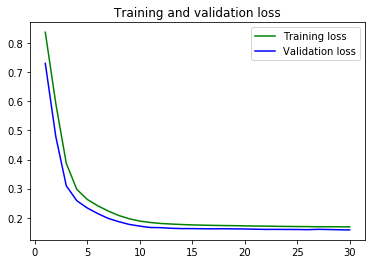

In [31]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.figure()
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Plot the Training Set Results

In [32]:
train_preds = model.predict_generator(train_gen, steps=train_steps, workers=0)
train_preds = scaler.inverse_transform(train_preds)
train_preds[:10]

array([[ 34.93928528],
       [ 35.4032402 ],
       [ 33.50272369],
       [ 34.32249069],
       [ 34.61015701],
       [ 33.8200264 ],
       [ 34.17856598],
       [ 35.19870758],
       [ 34.63750839],
       [ 33.1445961 ]], dtype=float32)

In [33]:
train_preds.shape

Text(0.5,1,'SDE-3 PWM dataset 1 training vs predicted')

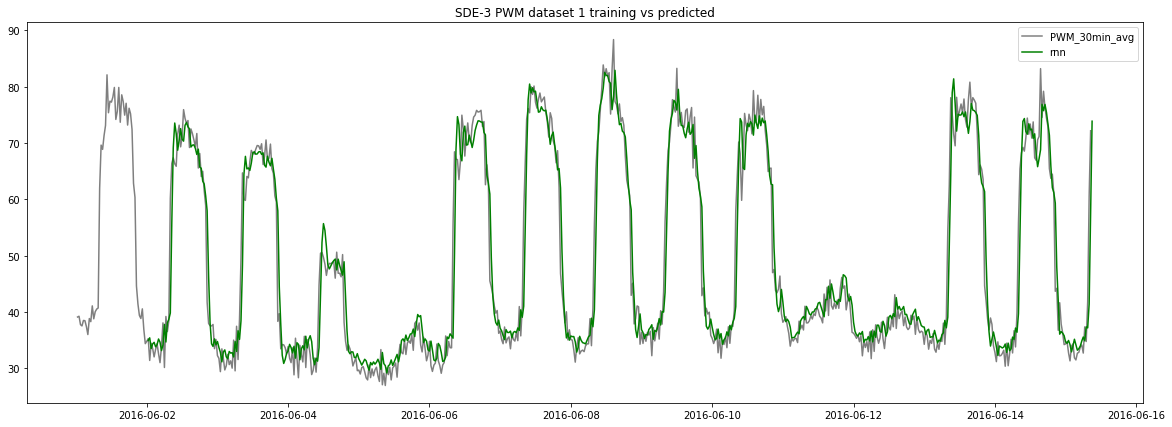

In [34]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[:train_max_idx-1, sde3_1_df.columns.get_loc('PWM_30min_avg')], color='black', alpha=0.5)
plt.plot(sde3_1_df.index[lookback:lookback+len(train_preds)], train_preds, color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 training vs predicted')

## Plot the Validation Set Results

In [35]:
val_preds = model.predict_generator(val_gen, steps=val_steps, workers=0)
val_preds = scaler.inverse_transform(val_preds)
val_preds[:10]

array([[ 72.26467133],
       [ 71.19017029],
       [ 71.97834015],
       [ 71.65343475],
       [ 68.7358551 ],
       [ 70.71297455],
       [ 73.52878571],
       [ 69.40494537],
       [ 66.93307495],
       [ 69.04270172]], dtype=float32)

In [36]:
val_preds.shape

(297, 1)

Text(0.5,1,'SDE-3 PWM dataset 1 validation vs predicted')

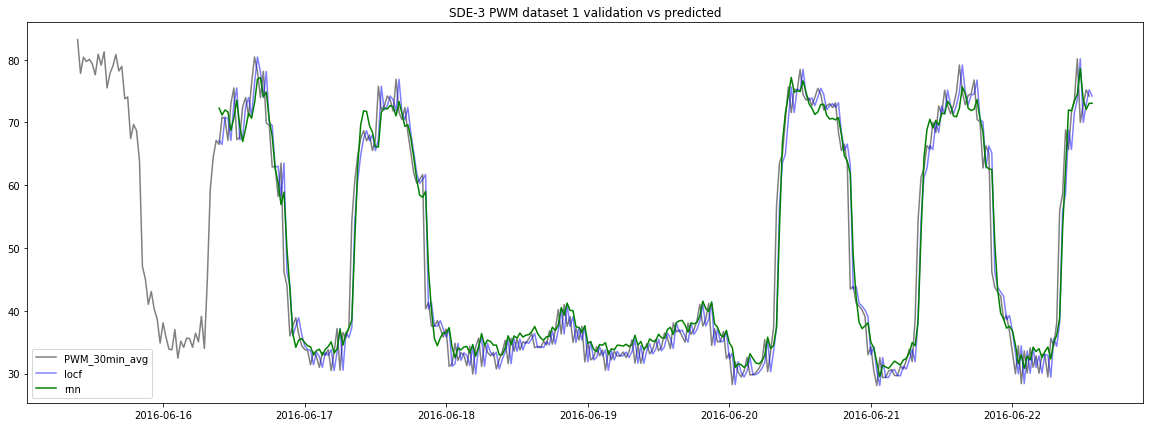

In [37]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[train_max_idx:(val_max_idx-1), sde3_1_df.columns.get_loc('PWM_30min_avg')],
         color='black', alpha=0.5)
plt.plot(sde3_1_df.index[(train_max_idx+lookback):(train_max_idx+lookback+len(locf_preds))], locf_preds,
         color='blue', alpha=0.5, label='locf')
plt.plot(sde3_1_df.index[(train_max_idx+lookback):(train_max_idx+lookback+len(val_preds))], val_preds,
         color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 validation vs predicted')

Text(0.5,1,'SDE-3 PWM dataset 1 validation vs predicted')

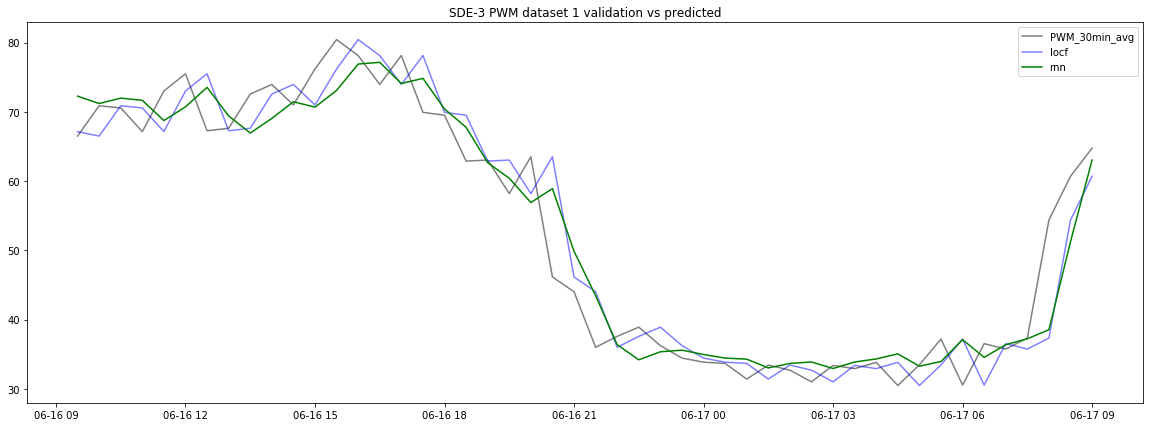

In [38]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[train_max_idx+lookback:train_max_idx+lookback+48, sde3_1_df.columns.get_loc('PWM_30min_avg')],
         color='black', alpha=0.5)
plt.plot(sde3_1_df.index[train_max_idx+lookback:train_max_idx+lookback+48], locf_preds[:48],
         color='blue', alpha=0.5, label='locf')
plt.plot(sde3_1_df.index[train_max_idx+lookback:train_max_idx+lookback+48], val_preds[:48],
         color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 validation vs predicted')

In [39]:
eval = model.evaluate_generator(val_gen, steps=val_steps, workers=0)
eval

[0.15795964644814181, 24.0819359788991]

In [40]:
history.history['loss'][-1]

0.16833385723030828

## Plot the Validation Curve

In [41]:
# Train and evaluate models with different number of hidden nodes.
val_curve_res = []
for i in [4, 8, 16, 32, 64, 128]:
    # Model specifications
    model = Sequential()
    model.add(layers.GRU(i, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
    model.add(layers.Dense(1))
    model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])
    # Fit model
    print('Fitting model with %d hidden nodes ...' % i)
    history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=30,
                                  validation_data=val_gen, validation_steps=val_steps,
                                  workers=0, use_multiprocessing=False, verbose=0)
    # Add eval results to list
    val_curve_res.append([i, history.history['loss'][-1], history.history['val_loss'][-1]])

Fitting model with 4 hidden nodes ...


Fitting model with 8 hidden nodes ...


Fitting model with 16 hidden nodes ...


Fitting model with 32 hidden nodes ...


Fitting model with 64 hidden nodes ...


Fitting model with 128 hidden nodes ...


In [42]:
val_curve_res

[[4, 0.17741989569500599, 0.16197804404228222],
 [8, 0.16166065173728444, 0.15191499231640337],
 [16, 0.16612162006978307, 0.15666853779494161],
 [32, 0.1664999966680818, 0.16050940355668566],
 [64, 0.16512701704494678, 0.17386270507618232],
 [128, 0.16804702584617234, 0.17498482417578648]]

Text(0.5,1,'Validation curve for base RNN model')

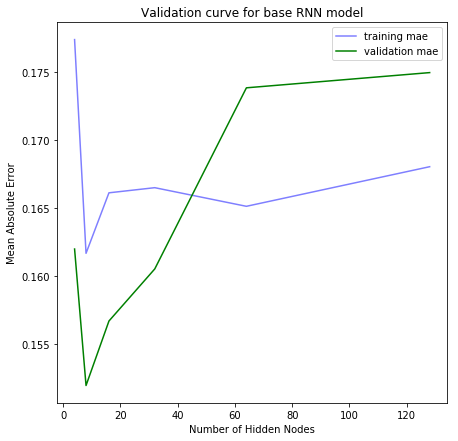

In [43]:
val_curve_res = np.array(val_curve_res)
plt.figure(figsize=(7, 7))
plt.plot(val_curve_res[:, 0], val_curve_res[:, 1], color='blue', alpha=0.5, label='training mae')
plt.plot(val_curve_res[:, 0], val_curve_res[:, 2], color='green', label='validation mae')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Validation curve for base RNN model')

The validation MAE increases when the number of hidden nodes exceeds 8, showing signs of model overfitting.

## Plot the Learning Curve

In [44]:
# Train and evaluate a model with fitted with different number of samples in the training set.
learn_curve_res = []
splits = [0, 115, 230, 345, 460, 575]
splits.reverse()
for i in splits:  # i is the min index
    # Model specifications
    model = Sequential()
    model.add(layers.GRU(8, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
    model.add(layers.Dense(1))
    model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])
    # generator
    a_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                      lookback=lookback, delay=delay, min_index=i, max_index=train_max_idx-1,
                      batch_size=batch_size, step=step)
    tr_steps = ((train_max_idx - i - lookback + 1 - delay) // batch_size) + 1
    # Fit model
    print('Fitting model with %d samples' % (train_max_idx - i))
    history = model.fit_generator(a_gen, steps_per_epoch=tr_steps, epochs=30,
                                  validation_data=val_gen, validation_steps=val_steps,
                                  workers=0, use_multiprocessing=False, verbose=0)
    # Add eval results to list
    learn_curve_res.append([train_max_idx - i, history.history['loss'][-1], history.history['val_loss'][-1]])

Fitting model with 115 samples


Fitting model with 230 samples


Fitting model with 345 samples


Fitting model with 460 samples


Fitting model with 575 samples


Fitting model with 690 samples


In [45]:
learn_curve_res

[[115, 0.44517625623674534, 0.38685708555709636],
 [230, 0.26251604170589654, 0.25645254557381575],
 [345, 0.19402783165877113, 0.17352143913407117],
 [460, 0.16847100260766965, 0.15194004573404588],
 [575, 0.16720924318628475, 0.15502185432196466],
 [690, 0.16237551568081818, 0.15179949878442167]]

Text(0.5,1,'Learning curve for base RNN model')

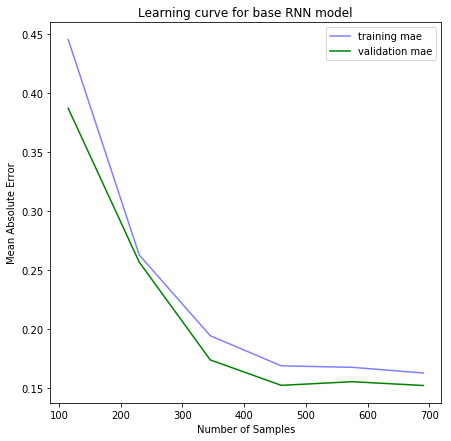

In [46]:
learn_curve_res = np.array(learn_curve_res)
plt.figure(figsize=(7, 7))
plt.plot(learn_curve_res[:, 0], learn_curve_res[:, 1], color='blue', alpha=0.5, label='training mae')
plt.plot(learn_curve_res[:, 0], learn_curve_res[:, 2], color='green', label='validation mae')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Learning curve for base RNN model')

The learning curves for training and validation losses have converged. More data will not be beneficial for lowering the model loss.

## Score the base RNN model on the test set

In [47]:
comb_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                     lookback=lookback, delay=delay, min_index=0, max_index=val_max_idx - 1,
                     batch_size=batch_size, step=step)
comb_steps = ((val_max_idx - lookback + 1 - delay) // batch_size) + 1

In [48]:
model = Sequential()
model.add(layers.GRU(8, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])

In [49]:
history = model.fit_generator(comb_gen, steps_per_epoch=comb_steps, epochs=30,
                              validation_data=None, validation_steps=None,
                              workers=0, use_multiprocessing=False, verbose=0)

In [50]:
test_score = model.evaluate_generator(test_gen, steps=test_steps, workers=0)
test_score

[0.17080211227991765, 38.512679350496541]

In [51]:
print('Model Test MAE without normalization = %f' %
      (test_score[0] * sde3_1_df['PWM_30min_avg'].values[:train_max_idx].std()))

Model Test MAE without normalization = 3.010799


In [52]:
# Calculate a simple baseline for model accuracy using MAE. Baseline model predicts label at t as label at t-1
# (LOCF last observation carry forward)
batch_test_maes = []
for a_step in range(test_steps):
    samples, targets = next(test_gen)
    a_pred = samples[:, -1, 0]
    mae = np.mean(np.abs(a_pred - targets))
    batch_test_maes.append(mae)
print('LOCF Test MAE = %f' % (np.mean(batch_test_maes)))
print('LOCF Test MAE without normalization = %f' %
      (np.mean(batch_test_maes) * sde3_1_df['PWM_30min_avg'].values[:train_max_idx].std()))

LOCF Test MAE = 0.178080
LOCF Test MAE without normalization = 3.139083
